
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for building ARIMA models is the following:
* Visualize the Time Series Data
* Stationarise the time series data
* Plot the Correlation and AutoCorrelation Charts and find optimal parameters
* Build the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.shape

(107, 2)

In [5]:
df.head(20)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [11]:
df.drop(105,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null object
Sales    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [14]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [16]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
df.set_index('Month',inplace=True)

In [18]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [19]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 1: Visualize the Data

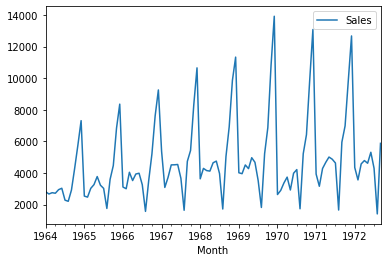

In [20]:
df.plot()

# Step 2: Testing For Stationarity

We can perform stationarity test of the time series data using the following:

1) Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance means at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. This is more of a visual technique.

2) Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

In [21]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])
test_result

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
def adfuller_test(sales):
    #Determing rolling statistics
    rolmean = pd.Series(sales).rolling(window=12).mean()
    rolstd = pd.Series(sales).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(sales, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    result=adfuller(sales)
    dfoutput = pd.Series(result[0:4], index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if result[1] <= 0.05:
        print("The test statistic is way less than the critical values. Also, based on the p-value, we have strong evidence against the null hypothesis(Ho), reject the null hypothesis. Indicating the time series data is stationary")
    else:
        print("The test statistic is way more than the critical values. Also, based on the p-value, we have weak evidence against null hypothesis, Indicating the time series data is non-stationary")
    

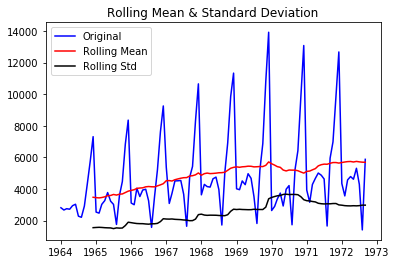

ADF Test Statistic             -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64
The test statistic is way more than the critical values. Also, based on the p-value, we have weak evidence against null hypothesis, Indicating the time series data is non-stationary


In [23]:
adfuller_test(df['Sales'])

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series

### Estimating & Eliminating Trend

One of the popular technique to reduce trend is by applying transformation such as log, square root, cube root, etc

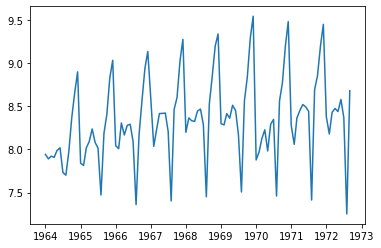

In [29]:
ts_log = np.log(df['Sales'])
plt.plot(ts_log)

It is not very intuitive to identify the trend in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. One of the most popular technique is 
Aggregation – taking average for a time period like monthly/weekly averages

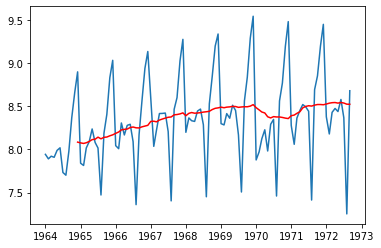

In [30]:
# In moving average, we take average of ‘k’ consecutive values depending on the frequency of time series. 
# Here we can take the average over the past 1 year, i.e. last 12 values.

moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [31]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1964-01-01         NaN
1964-02-01         NaN
1964-03-01         NaN
1964-04-01         NaN
1964-05-01         NaN
1964-06-01         NaN
1964-07-01         NaN
1964-08-01         NaN
1964-09-01         NaN
1964-10-01         NaN
1964-11-01         NaN
1964-12-01    0.813316
Name: Sales, dtype: float64

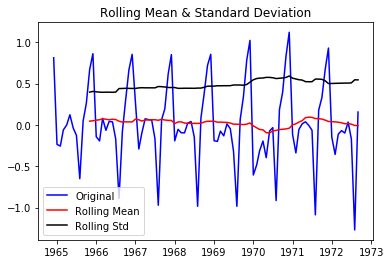

ADF Test Statistic             -1.750538
p-value                         0.405279
#Lags Used                     12.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64
The test statistic is way more than the critical values. Also, based on the p-value, we have weak evidence against null hypothesis, Indicating the time series data is non-stationary


In [32]:
ts_log_moving_avg_diff.dropna(inplace=True)
adfuller_test(ts_log_moving_avg_diff)

One more popular technique to eliminate trend component is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

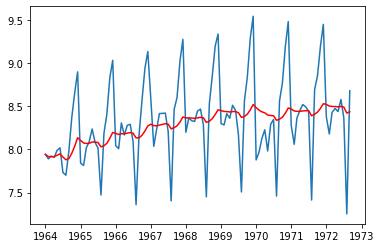

In [33]:
expwighted_avg = ts_log.ewm(halflife=12).mean() #decay is specified in terms of half-life
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

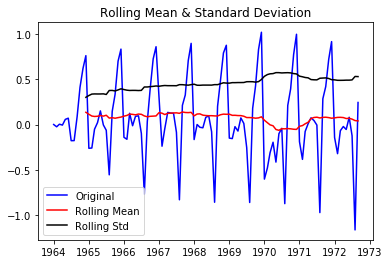

ADF Test Statistic             -1.577340
p-value                         0.494966
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
The test statistic is way more than the critical values. Also, based on the p-value, we have weak evidence against null hypothesis, Indicating the time series data is non-stationary


In [34]:
ts_log_ewma_diff = ts_log - expwighted_avg
adfuller_test(ts_log_ewma_diff)

### Eliminating Trend and Seasonality

The above trend reduction techniques doesn't work if the time series has high seasonality. In such scenarios, there are two ways of removing trend and seasonality:

1) Differencing – taking the differece with a particular time lag

2) Decomposition – modeling both trend and seasonality and removing them from the model.

## Differencing

In this technique, we take the difference of the observation at a particular instant with that at the previous instant. In this technique, we try to eliminiate the seasonality and trend by substracting the time series data with its previous instance of previous years. This mostly works well in improving stationarity.

In [36]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [35]:
df['Sales'][:20]

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
1964-06-01    3036.0
1964-07-01    2282.0
1964-08-01    2212.0
1964-09-01    2922.0
1964-10-01    4301.0
1964-11-01    5764.0
1964-12-01    7312.0
1965-01-01    2541.0
1965-02-01    2475.0
1965-03-01    3031.0
1965-04-01    3266.0
1965-05-01    3776.0
1965-06-01    3230.0
1965-07-01    3028.0
1965-08-01    1759.0
Name: Sales, dtype: float64

In [28]:
df['Sales'].shift(12)[:20]

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
1964-06-01       NaN
1964-07-01       NaN
1964-08-01       NaN
1964-09-01       NaN
1964-10-01       NaN
1964-11-01       NaN
1964-12-01       NaN
1965-01-01    2815.0
1965-02-01    2672.0
1965-03-01    2755.0
1965-04-01    2721.0
1965-05-01    2946.0
1965-06-01    3036.0
1965-07-01    2282.0
1965-08-01    2212.0
Name: Sales, dtype: float64

In [ ]:
df['Sales'].shift(1)

In [37]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [38]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [40]:
df.head(24)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


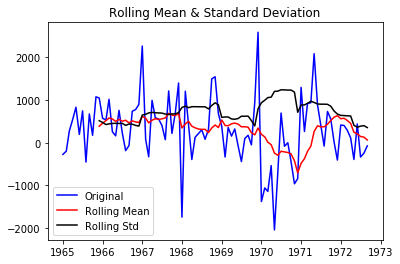

ADF Test Statistic            -7.626619e+00
p-value                        2.060580e-11
#Lags Used                     0.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64
The test statistic is way less than the critical values. Also, based on the p-value, we have strong evidence against the null hypothesis(Ho), reject the null hypothesis. Indicating the time series data is stationary


In [41]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

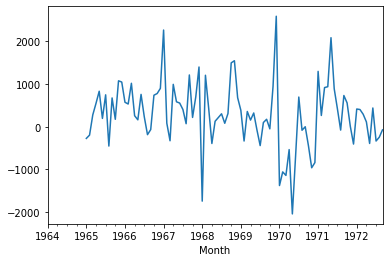

In [42]:
df['Seasonal First Difference'].plot()

## Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

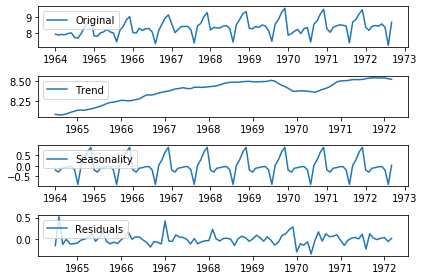

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In the above step, we are able to separate out the trend, seasonality component from our time series. Now, we can model the residuals and check for the stationarity of residuals

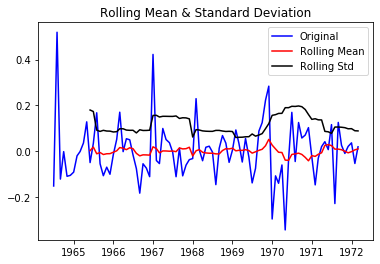

ADF Test Statistic            -6.275488e+00
p-value                        3.910002e-08
#Lags Used                     7.000000e+00
Number of Observations Used    8.500000e+01
Critical Value (1%)           -3.509736e+00
Critical Value (5%)           -2.896195e+00
Critical Value (10%)          -2.585258e+00
dtype: float64
The test statistic is way less than the critical values. Also, based on the p-value, we have strong evidence against the null hypothesis(Ho), reject the null hypothesis. Indicating the time series data is stationary


In [44]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
adfuller_test(ts_log_decompose)

# Step 3: Plot the Correlation and AutoCorrelation Charts and find optimal parameters

## Auto Regressive Model
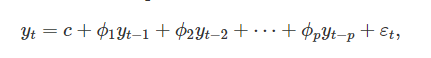

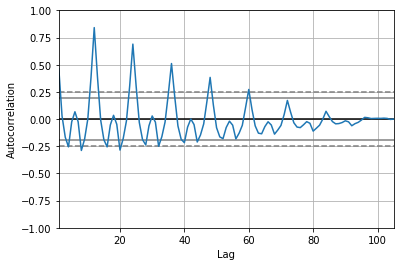

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

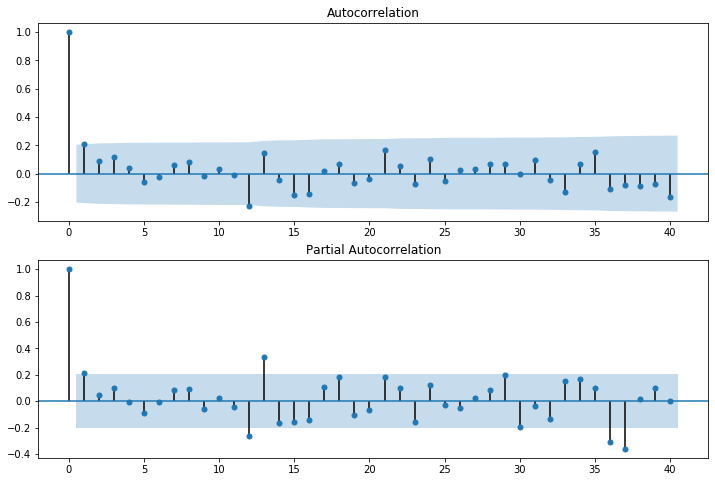

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# The Optimal Parameters are:
#p=1, d=1, q=1

# Step 4: Build the ARIMA Model

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\v-ashnay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\v-ashnay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 05 Dec 2020   AIC                           1910.251
Time:                        09:02:54   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.069      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

# Step 5: Use the model to make predictions

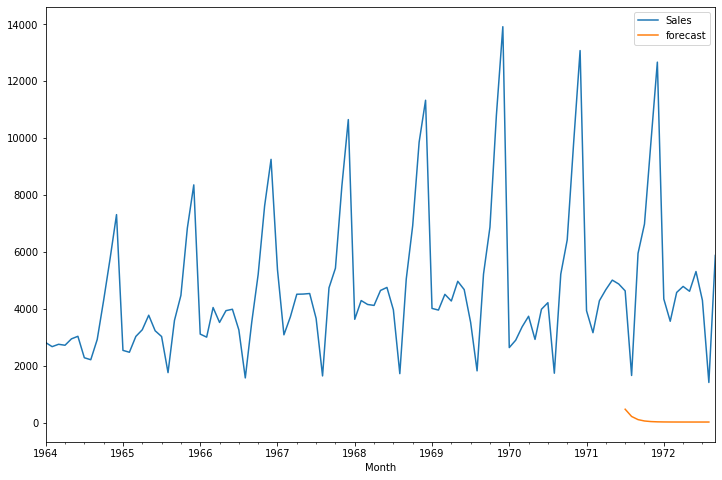

In [52]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [53]:
df.tail(20)

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.031790
1971-08-01,1659.0,-2974.0,-79.0,218.346542
1971-09-01,5951.0,4292.0,730.0,107.725126
1971-10-01,6981.0,1030.0,557.0,59.677201


# Step 6: Build the Seasonal ARIMA Model

In [54]:
import statsmodels.api as sm

In [55]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\v-ashnay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


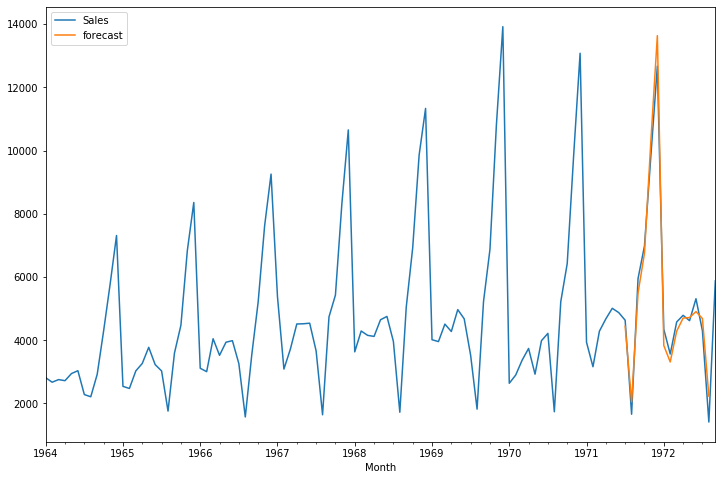

In [56]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [57]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [63]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.head(24)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [65]:
future_df=pd.concat([df,future_datest_df])
future_df.tail(30)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-03-01,4577.0,1013.0,291.0,4285.476507
1972-04-01,4788.0,211.0,112.0,4701.093060
1972-05-01,4618.0,-170.0,-392.0,4717.511780
1972-06-01,5312.0,694.0,438.0,4906.404477
1972-07-01,4298.0,-1014.0,-335.0,4685.437284
1972-08-01,1413.0,-2885.0,-246.0,2232.408908
1972-09-01,5877.0,4464.0,-74.0,NaN
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [66]:
future_df.shape

(128, 4)

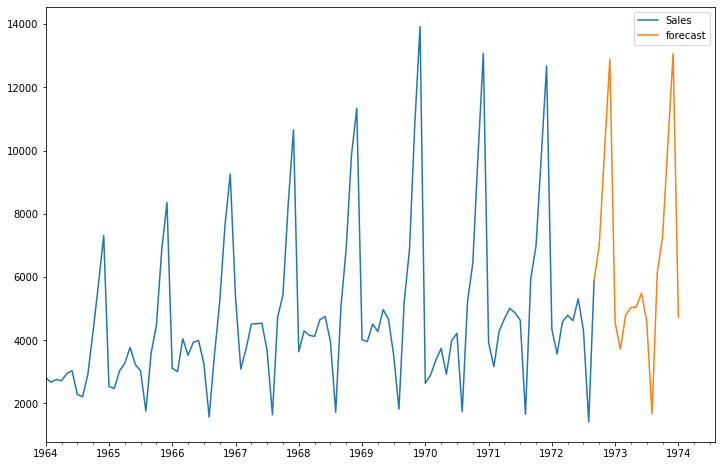

In [67]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
future_df.tail(30)